Nama : Rafil Moehamad Alif <br>
NIM : 211351116 <br>
Kelas : Malam B

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rafilalif","key":"ec4ef95ce827681984e0ad803b1e8b1a"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d ehababoelnaga/multiple-disease-prediction

Dataset URL: https://www.kaggle.com/datasets/ehababoelnaga/multiple-disease-prediction
License(s): Apache 2.0
  0% 0.00/285k [00:00<?, ?B/s]
100% 285k/285k [00:00<00:00, 90.8MB/s]


In [5]:
!mkdir multiple-disease-prediction
!unzip multiple-disease-prediction.zip -d multiple-disease-prediction
!ls multiple-disease-prediction

Archive:  multiple-disease-prediction.zip
  inflating: multiple-disease-prediction/Blood_samples_dataset_balanced_2(f).csv  
  inflating: multiple-disease-prediction/blood_samples_dataset_test.csv  
'Blood_samples_dataset_balanced_2(f).csv'   blood_samples_dataset_test.csv


In [6]:
df_test = pd.read_csv('/content/multiple-disease-prediction/blood_samples_dataset_test.csv')

In [7]:
df_test.head(10)

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di
5,0.321872,0.554649,0.195652,0.427216,0.807751,0.376964,0.519526,0.028090,0.382538,0.568205,...,0.711377,0.887863,0.370344,0.607066,0.936445,0.160355,0.108994,0.599071,0.560535,Heart Di
6,0.677636,0.435037,0.572571,0.965847,0.010580,0.753719,0.262138,0.789804,0.541149,0.550569,...,0.196416,0.141203,0.355437,0.468168,0.493548,0.213971,0.059427,0.836447,0.231356,Diabetes
7,0.105103,0.177558,0.169041,0.679138,0.886839,0.714977,0.197501,0.778653,0.319864,0.285914,...,0.259719,0.305473,0.867800,0.213141,0.094877,0.120487,0.211855,0.376829,0.645990,Diabetes
8,0.186686,0.210425,0.165662,0.207388,0.918350,0.746808,0.230674,0.616086,0.533183,0.400058,...,0.600902,0.812273,0.332766,0.797290,0.190961,0.298596,0.877684,0.966106,0.306355,Heart Di
9,0.448025,0.974133,0.143226,0.471179,0.161697,0.610458,0.470737,0.275112,0.702463,0.423561,...,0.435143,0.934164,0.094991,0.795212,0.456302,0.122741,0.820810,0.045505,0.562205,Diabetes


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    486 non-null    float64
 1   Cholesterol                                486 non-null    float64
 2   Hemoglobin                                 486 non-null    float64
 3   Platelets                                  486 non-null    float64
 4   White Blood Cells                          486 non-null    float64
 5   Red Blood Cells                            486 non-null    float64
 6   Hematocrit                                 486 non-null    float64
 7   Mean Corpuscular Volume                    486 non-null    float64
 8   Mean Corpuscular Hemoglobin                486 non-null    float64
 9   Mean Corpuscular Hemoglobin Concentration  486 non-null    float64
 10  Insulin                   

In [9]:
df_test.shape

(486, 25)

In [10]:
print('test_df missing values: ',df_test.isna().sum().sum())

test_df missing values:  0


In [11]:
df_train = pd.read_csv('/content/multiple-disease-prediction/Blood_samples_dataset_balanced_2(f).csv')

In [12]:
df_train.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [13]:
df_train.shape

(2351, 25)

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [15]:
print('test_df missing values: ',df_train.isna().sum().sum())

test_df missing values:  0


In [16]:
data = pd.concat([df_test, df_train], ignore_index=True)

In [17]:
data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di


In [18]:
data.shape

(2837, 25)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2837 entries, 0 to 2836
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2837 non-null   float64
 1   Cholesterol                                2837 non-null   float64
 2   Hemoglobin                                 2837 non-null   float64
 3   Platelets                                  2837 non-null   float64
 4   White Blood Cells                          2837 non-null   float64
 5   Red Blood Cells                            2837 non-null   float64
 6   Hematocrit                                 2837 non-null   float64
 7   Mean Corpuscular Volume                    2837 non-null   float64
 8   Mean Corpuscular Hemoglobin                2837 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2837 non-null   float64
 10  Insulin                 

In [20]:
data.Disease.value_counts()

Disease
Diabetes    834
Anemia      707
Healthy     561
Thalasse    557
Thromboc    139
Heart Di     39
Name: count, dtype: int64

In [21]:
data.Disease = data.Disease.astype('category')
d = dict(enumerate(data['Disease'].cat.categories))
data.Disease = data.Disease.cat.codes.values
data.Disease

0       4
1       1
2       3
3       1
4       3
       ..
2832    1
2833    4
2834    0
2835    1
2836    0
Name: Disease, Length: 2837, dtype: int8

Text(0.5, 1.0, 'Correlation Heatmap')

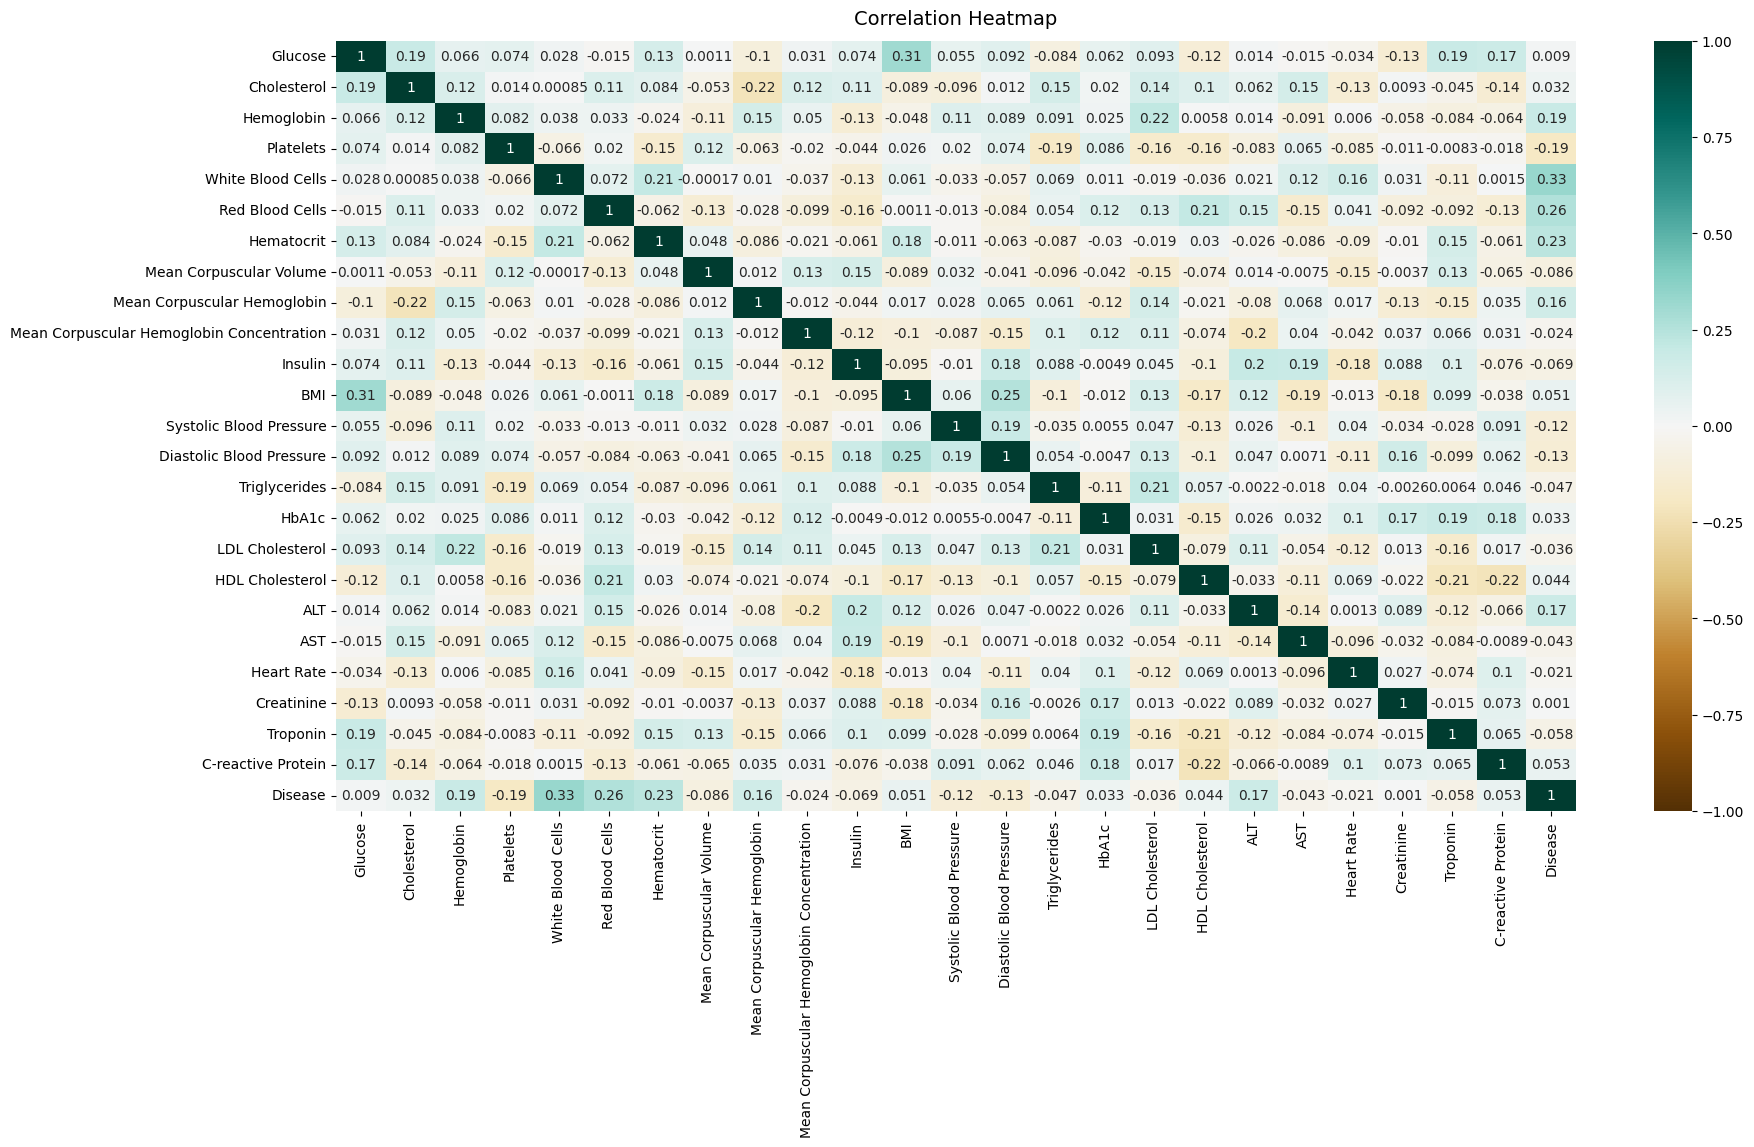

In [22]:
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

0: Anemia <br>
1: Diabetes <br>
2: Healty <br>
3: Heart Di <br>
4: Thalasse <br>
5: Thromboc

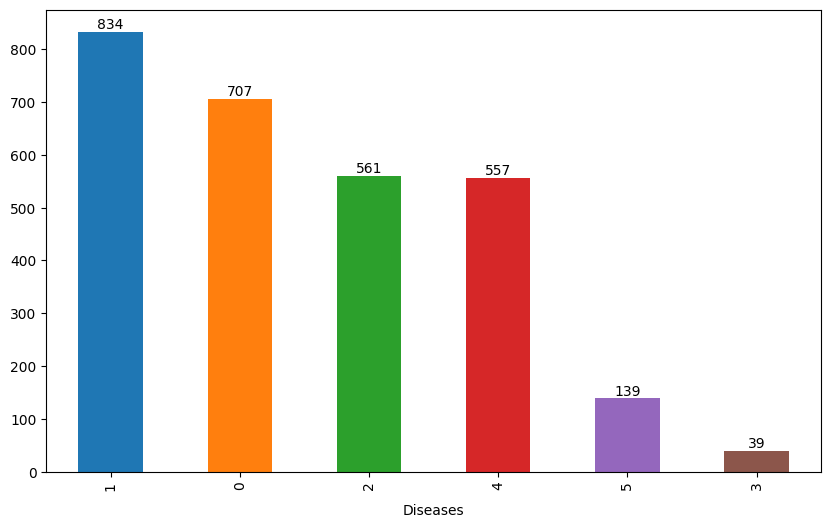

In [23]:
counts = data[data.columns[-1]].value_counts()
palette = sns.color_palette()
fig, axes = plt.subplots(figsize=(10,6))
counts.plot(kind="bar", ax=axes, color=palette)
plt.xlabel('Diseases',labelpad=10)
for container in axes.containers:
    axes.bar_label(container)
plt.show()

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2837 entries, 0 to 2836
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2837 non-null   float64
 1   Cholesterol                                2837 non-null   float64
 2   Hemoglobin                                 2837 non-null   float64
 3   Platelets                                  2837 non-null   float64
 4   White Blood Cells                          2837 non-null   float64
 5   Red Blood Cells                            2837 non-null   float64
 6   Hematocrit                                 2837 non-null   float64
 7   Mean Corpuscular Volume                    2837 non-null   float64
 8   Mean Corpuscular Hemoglobin                2837 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2837 non-null   float64
 10  Insulin                 

In [25]:
data = data.rename(columns={
    "White Blood Cells": "White_Blood_Cells",
    "Red Blood Cells": "Red_Blood_Cells",
    "Mean Corpuscular Volume": "Mean_Corpuscular_Volume",
    "Mean Corpuscular Hemoglobin": "Mean_Corpuscular_Hemoglobin",
    "Mean Corpuscular Hemoglobin Concentration": "Mean_Corpuscular_Hemoglobin_Concentration",
    "Systolic Blood Pressure": "Systolic_Blood_Pressure",
    "Diastolic Blood Pressure": "Diastolic_Blood_Pressure",
    "LDL Cholesterol": "LDL_Cholesterol",
    "HDL Cholesterol": "HDL_Cholesterol",
    "Heart Rate": "Heart_Rate",
    "C-reactive Protein": "C_reactive_Protein"
})

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2837 entries, 0 to 2836
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2837 non-null   float64
 1   Cholesterol                                2837 non-null   float64
 2   Hemoglobin                                 2837 non-null   float64
 3   Platelets                                  2837 non-null   float64
 4   White_Blood_Cells                          2837 non-null   float64
 5   Red_Blood_Cells                            2837 non-null   float64
 6   Hematocrit                                 2837 non-null   float64
 7   Mean_Corpuscular_Volume                    2837 non-null   float64
 8   Mean_Corpuscular_Hemoglobin                2837 non-null   float64
 9   Mean_Corpuscular_Hemoglobin_Concentration  2837 non-null   float64
 10  Insulin                 

In [27]:
X = data.drop('Disease', axis=1)
y = data['Disease']

In [28]:
X

,Glucose,Cholesterol,Hemoglobin,Platelets,White_Blood_Cells,Red_Blood_Cells,Hematocrit,Mean_Corpuscular_Volume,Mean_Corpuscular_Hemoglobin,Mean_Corpuscular_Hemoglobin_Concentration,...,Triglycerides,HbA1c,LDL_Cholesterol,HDL_Cholesterol,ALT,AST,Heart_Rate,Creatinine,Troponin,C_reactive_Protein
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.970168,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.517805,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.521000,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.944932,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.082744,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,0.012956,0.336925,0.451218,0.175006,0.734664,0.382770,0.656463,0.177502,0.808162,0.684499,...,0.928344,0.670665,0.311568,0.595083,0.155866,0.885812,0.636125,0.132226,0.716519,0.006121
2833,0.407101,0.124738,0.983306,0.663867,0.361113,0.663716,0.232516,0.341056,0.847441,0.309766,...,0.299213,0.491185,0.701914,0.218104,0.790341,0.570902,0.339125,0.310964,0.310900,0.622403
2834,0.344356,0.783918,0.582171,0.996841,0.065363,0.242885,0.658851,0.543017,0.290106,0.838722,...,0.572330,0.141738,0.155871,0.473638,0.250535,0.387197,0.344728,0.606719,0.395145,0.134021
2835,0.351722,0.014278,0.898615,0.167550,0.727148,0.046091,0.900434,0.136227,0.134361,0.279219,...,0.191626,0.570553,0.171245,0.858352,0.362012,0.290984,0.996873,0.882164,0.411158,0.146255


In [29]:
y

0       4
1       1
2       3
3       1
4       3
       ..
2832    1
2833    4
2834    0
2835    1
2836    0
Name: Disease, Length: 2837, dtype: int8

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify= y)

In [31]:
print('train shape:', X_train.shape)
print('test shape: ', X_test.shape)

train shape: (2269, 24)
test shape:  (568, 24)


In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add( tf.keras.layers.Dense(6, activation='softmax'))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6400      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 6)                 3

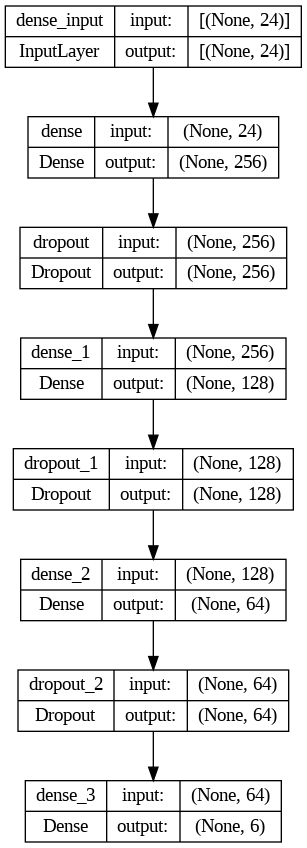

In [35]:
plot_model(model, show_shapes = True)

In [36]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [37]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True, monitor='val_loss')

In [38]:
history = model.fit(X_train_scaled, y_train, epochs=100,
                    validation_split=0.1, callbacks=[early_stopping], verbose=2)

Epoch 1/100
64/64 - 4s - loss: 1.1036 - accuracy: 0.5921 - val_loss: 0.4368 - val_accuracy: 0.9119 - 4s/epoch - 70ms/step
Epoch 2/100
64/64 - 0s - loss: 0.4304 - accuracy: 0.8942 - val_loss: 0.2137 - val_accuracy: 0.9471 - 309ms/epoch - 5ms/step
Epoch 3/100
64/64 - 0s - loss: 0.2690 - accuracy: 0.9290 - val_loss: 0.1934 - val_accuracy: 0.9383 - 350ms/epoch - 5ms/step
Epoch 4/100
64/64 - 0s - loss: 0.2203 - accuracy: 0.9388 - val_loss: 0.1706 - val_accuracy: 0.9427 - 359ms/epoch - 6ms/step
Epoch 5/100
64/64 - 0s - loss: 0.1930 - accuracy: 0.9373 - val_loss: 0.1738 - val_accuracy: 0.9471 - 214ms/epoch - 3ms/step
Epoch 6/100
64/64 - 0s - loss: 0.1584 - accuracy: 0.9496 - val_loss: 0.1712 - val_accuracy: 0.9471 - 216ms/epoch - 3ms/step
Epoch 7/100
64/64 - 0s - loss: 0.1193 - accuracy: 0.9638 - val_loss: 0.1702 - val_accuracy: 0.9515 - 223ms/epoch - 3ms/step
Epoch 8/100
64/64 - 0s - loss: 0.1101 - accuracy: 0.9677 - val_loss: 0.1754 - val_accuracy: 0.9471 - 215ms/epoch - 3ms/step
Epoch 9/10

In [39]:
print('test set', model.evaluate(X_test_scaled,y_test))
print('train set', model.evaluate(X_train_scaled,y_train))

18/18 [==============================] - 0s 2ms/step - loss: 0.2450 - accuracy: 0.9208
test set [0.24499328434467316, 0.9207746386528015]
71/71 [==============================] - 0s 2ms/step - loss: 0.0726 - accuracy: 0.9753
train set [0.07256978750228882, 0.975319504737854]


In [40]:
results = pd.DataFrame([],columns=['Accuracy','train Accuracy'])

In [41]:
akurasi = model.evaluate(X_test_scaled, y_test)
train_accuracy = model.evaluate(X_train_scaled, y_train)
results.loc['ANN Model'] = [akurasi, train_accuracy]

71/71 [==============================] - 0s 3ms/step - loss: 0.0726 - accuracy: 0.9753


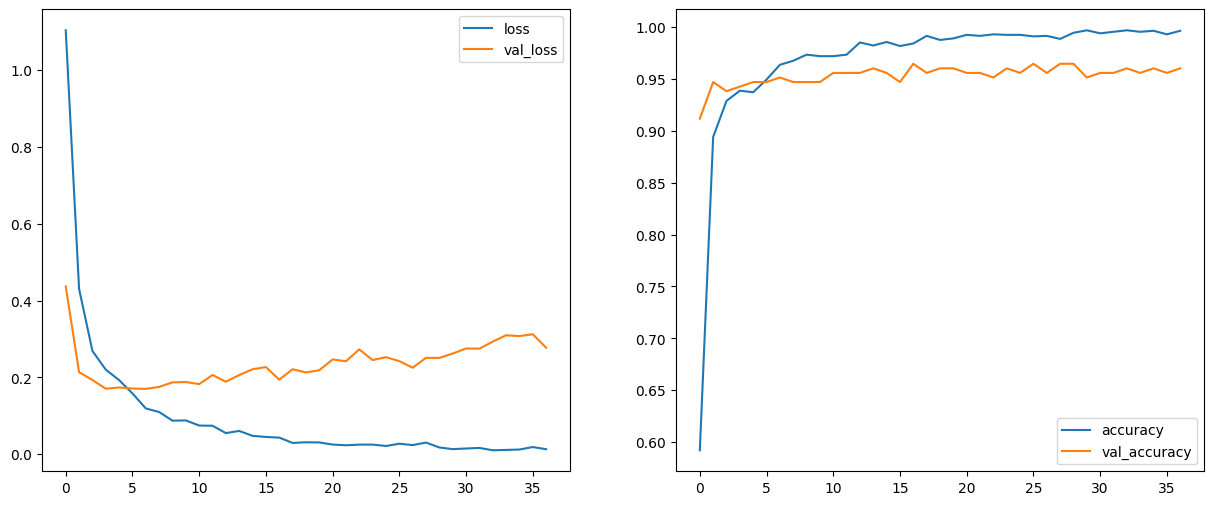

In [42]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='best')

In [43]:
input_data = [0.73,0.65,0.71,0.86,0.68,0.52,0.29,0.63,0.00,0.79,0.03,0.07,0.18,0.07,0.65,0.50,0.21,0.51,0.06,0.61,0.93,0.09,0.46,0.76]
input_data = np.array(input_data).reshape(1, -1)

In [44]:
input_data_scaled = scaler.transform(input_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [45]:
prediction = model.predict(input_data_scaled)

1/1 [==============================] - 0s 166ms/step


In [46]:
predicted_class = np.argmax(prediction)

In [47]:
disease_mapping = {
    0: "Anemia",
    1: "Diabetes",
    2: "Healthy",
    3: "Heart Disease",
    4: "Thalassemia",
    5: "Thrombosis"
}

# Get the disease name from the prediction
predicted_disease = disease_mapping.get(predicted_class, "Unknown")

print(f"Predicted Disease: {predicted_disease}")

Predicted Disease: Healthy


In [48]:
keras_file = "disease.h5"
tf.keras.models.save_model(model, keras_file)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
open("disease.tflite","wb").write(tfmodel)

<ipython-input-48-c123d06e2a43>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model, keras_file)


194264